In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ticker_download_predict_upload import DownloadPredictUpload

In [2]:
dpu = DownloadPredictUpload()

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
tickers = ["I:SPX", "QQQ", "VXUS", "GLD"]

In [4]:
long_df_filename = os.path.join("input", f"Year of Tickers {dpu.get_today_date()}.csv")
if os.path.exists(long_df_filename):
    long_df = pd.read_csv(long_df_filename)
    long_df["datetime"] = pd.to_datetime(long_df["datetime"])
    long_df["datetime"] = long_df["datetime"].apply(
        lambda x: pd.Timestamp(x).replace(hour=23, minute=59, second=59)
    )
    long_df.set_index("datetime", inplace=True)
    long_df.sort_index(inplace=True)
else:
    date_from = dpu.past_business_day(pd.Timestamp(dpu.get_today_date()), 253)
    date_to = dpu.past_business_day(pd.Timestamp(dpu.get_today_date()), 1).replace(
        hour=23, minute=59, second=59
    )
    print(date_from, date_to)
    long_df = dpu.get_tickers(tickers, date_from=date_from, date_to=date_to)
    long_df.to_csv(long_df_filename, index=True)
long_df

,ticker,open,high,low,close,volume,vwap,transactions
datetime,,,,,,,,
2024-03-25 23:59:59,VXUS,59.92,60.145,59.890,59.99,2756590.0,60.0644,16491.0
2024-03-25 23:59:59,QQQ,443.55,446.260,442.540,444.76,27779904.0,445.0143,304143.0
2024-03-25 23:59:59,GLD,201.19,201.950,200.965,200.99,4034750.0,201.3506,43483.0
2024-03-25 23:59:59,I:SPX,5219.52,5229.090,5216.090,5218.19,NaN,NaN,NaN
2024-03-26 23:59:59,GLD,202.65,202.760,201.070,201.64,5752677.0,201.8118,65878.0
...,...,...,...,...,...,...,...,...
2025-03-27 23:59:59,I:SPX,5695.64,5732.280,5670.940,5693.31,NaN,NaN,NaN
2025-03-28 23:59:59,QQQ,479.81,480.520,468.050,468.94,46399302.0,472.5380,501401.0
2025-03-28 23:59:59,VXUS,62.96,62.960,62.385,62.51,4341736.0,62.5748,28386.0


In [5]:
wide_df = dpu.pivot_ticker_close_wide(long_df)
wide_df

ticker,GLD,I:SPX,QQQ,VXUS
2024-03-25 17:00:00,200.99,5218.19,444.76,59.99
2024-03-26 17:00:00,201.64,5203.58,443.32,59.99
2024-03-27 17:00:00,203.10,5248.49,444.83,60.32
2024-03-28 17:00:00,205.72,5254.35,444.01,60.30
2024-04-01 17:00:00,207.82,5243.77,444.95,60.19
...,...,...,...,...
2025-03-24 17:00:00,277.25,5767.57,490.66,63.56
2025-03-25 17:00:00,278.47,5776.65,493.46,63.77
2025-03-26 17:00:00,278.24,5712.20,484.38,63.11
2025-03-27 17:00:00,281.97,5693.31,481.62,63.25


In [6]:
wide_df.isna().sum().sum()

np.int64(0)

In [7]:
returns_df = wide_df.pct_change()
returns_df = returns_df.iloc[1:] * 100
returns_df

ticker,GLD,I:SPX,QQQ,VXUS
2024-03-26 17:00:00,0.323399,-0.279982,-0.323770,0.000000
2024-03-27 17:00:00,0.724063,0.863060,0.340612,0.550092
2024-03-28 17:00:00,1.290005,0.111651,-0.184340,-0.033156
2024-04-01 17:00:00,1.020805,-0.201357,0.211707,-0.182421
2024-04-02 17:00:00,1.477240,-0.723907,-0.863018,-0.415351
...,...,...,...,...
2025-03-24 17:00:00,-0.445258,1.764604,2.042259,0.157580
2025-03-25 17:00:00,0.440036,0.157432,0.570660,0.330396
2025-03-26 17:00:00,-0.082594,-1.115699,-1.840068,-1.034969
2025-03-27 17:00:00,1.340569,-0.330696,-0.569801,0.221835


In [8]:
mean_returns = returns_df.mean()
mean_returns

ticker
GLD      0.141561
I:SPX    0.030425
QQQ      0.028525
VXUS     0.019864
dtype: float64

In [9]:
cov = returns_df.cov()
cov_np = cov.to_numpy()
cov

ticker,GLD,I:SPX,QQQ,VXUS
ticker,,,,
GLD,0.948674,0.173506,0.251971,0.342089
I:SPX,0.173506,0.772472,1.029063,0.504102
QQQ,0.251971,1.029063,1.518830,0.663323
VXUS,0.342089,0.504102,0.663323,0.721902


In [10]:
n_portfolios = 10_000
d = len(mean_returns)
simulated_returns = np.zeros(n_portfolios)
simulated_risks = np.zeros(n_portfolios)
random_weights = []
rand_range = 1.0

for i in range(n_portfolios):
    w = np.random.random(d) * rand_range - rand_range / 2  # Allows short-selling
    w[-1] = 1 - w[:-1].sum()
    np.random.shuffle(w)
    random_weights.append(w)
    simulated_return = mean_returns.dot(w)
    simulated_risk = np.sqrt(w.dot(cov_np).dot(w))
    simulated_returns[i] = simulated_return
    simulated_risks[i] = simulated_risk

Text(0, 0.5, 'Return')

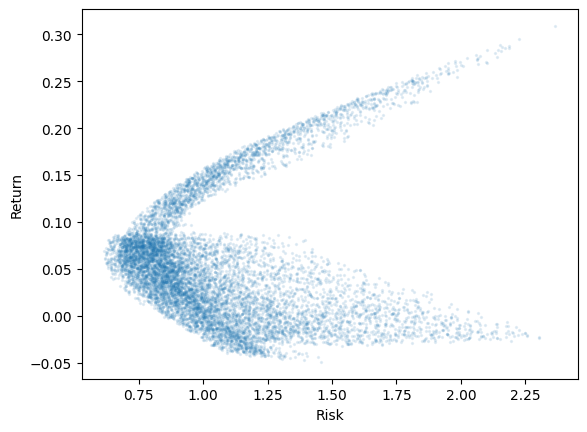

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(simulated_risks, simulated_returns, alpha=0.1, s=2)
ax.set_xlabel("Risk")
ax.set_ylabel("Return")